<a href="https://colab.research.google.com/github/AUT-Student/NN-HW4/blob/main/NN_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, AveragePooling2D
from keras.layers import Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.regularizers import l1, l2

# Dataset

In [2]:
ds = tfds.load('beans', split=["test", "train", "validation"], shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteA0A4BB/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteA0A4BB/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteA0A4BB/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


,image,label
0,,1 (bean_rust)
1,,1 (bean_rust)
2,,0 (angular_leaf_spot)
3,,0 (angular_leaf_spot)

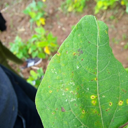
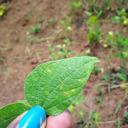
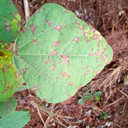
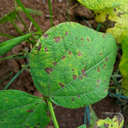

In [3]:
ds, info = tfds.load('beans', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

In [4]:
ds, info = tfds.load('beans', with_info=True)

print(info)

tfds.core.DatasetInfo(
    name='beans',
    version=0.1.0,
    description='Beans is a dataset of images of beans taken in the field using smartphone
cameras. It consists of 3 classes: 2 disease classes and the healthy class.
Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
by experts from the National Crops Resources Research Institute (NaCRRI) in
Uganda and collected by the Makerere AI research lab.',
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=1295,
    splits={
        'test': 128,
        'train': 1034,
        'validation': 133,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {beansdata,
        author="Makerere AI Lab",
        title="Bean disease dataset",
        month="January",
        year="2020",
        url="https://git

In [15]:
data_train = tfds.load(name="beans", split="train", batch_size=-1) 
data_valid = tfds.load(name="beans", split="validation", batch_size=-1)
data_test = tfds.load(name="beans", split="test", batch_size=-1)

data_train = tfds.as_numpy(data_train)
data_valid = tfds.as_numpy(data_valid)
data_test = tfds.as_numpy(data_test)

x_train, y_train = data_train["image"], data_train["label"]
x_valid, y_valid = data_valid["image"], data_valid["label"]
x_test, y_test = data_test["image"], data_test["label"]

In [10]:
x_train.shape

(1034, 500, 500, 3)

In [14]:
# batch_size=-1 to get the full dataset in NumPy arrays from the returned tf.Tensor object
mnist_train = tfds.load(name="mnist", split="train", batch_size=-1 ) 
mnist_test = tfds.load(name="mnist", split="test", batch_size=-1)

# tfds.as_numpy return a generator that yields NumPy array records out of a tf.data.Dataset
mnist_train = tfds.as_numpy(mnist_train) 
mnist_test = tfds.as_numpy(mnist_test)

x_train, y_train = mnist_train["image"], mnist_train["label"] # seperate the x and y
x_test, y_test = mnist_test["image"], mnist_test["label"]

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


# LeNet

In [92]:
class LeNet(keras.Model):
  def __init__(self, dropout_enable=False, l1_enable=False, l2_enable=False):
    super().__init__()

    self.model = Sequential()

    self.model.add(Input((500, 500, 3,), name="Input"))
    
    conv2D = Conv2D(6, kernel_size=5, strides=3, activation="tanh", name="Conv1", padding="same")
    if l1_enable:
      conv2D.kernel_regularizer = l1()
    elif l2_enable:
      conv2D.kernel_regularizer = l2()
    self.model.add(conv2D)

    if dropout_enable:
      self.model.add(Dropout(rate=0.5, name="Drop1"))
    
    self.model.add(AveragePooling2D(pool_size=3, name="Pool1"))
    
    conv2D = Conv2D(16, kernel_size=5, strides=3, activation="tanh", name="Conv2")
    if l1_enable:
      conv2D.kernel_regularizer = l1()
    elif l2_enable:
      conv2D.kernel_regularizer = l2()
    self.model.add(conv2D)
    
    if dropout_enable:
      self.model.add(Dropout(rate=0.5, name="Drop2"))

    self.model.add(AveragePooling2D(pool_size=3, name="Pool2"))
    conv2D = Conv2D(120, kernel_size=5, strides=3, activation="tanh", name="Conv3")
    if l1_enable:
      conv2D.kernel_regularizer = l1()
    elif l2_enable:
      conv2D.kernel_regularizer = l2()
    self.model.add(conv2D)
    
    if dropout_enable:
      self.model.add(Dropout(rate=0.5, name="Drop3"))
    
    self.model.add(Flatten(name="Flat"))
    self.model.add(Dense(84, activation="tanh", name="Dense"))
    self.model.add(Dense(3, activation="softmax", name="Output"))

  def call(self, inputs):
    return self.model.call(inputs)

In [96]:
lenet = LeNet(l2_enable=True)

In [97]:
lenet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [98]:
lenet.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=4)

Epoch 1/4
33/33 [==============================] - 23s 667ms/step - loss: 1.3788 - accuracy: 0.5116 - val_loss: 1.1572 - val_accuracy: 0.6241
Epoch 2/4
33/33 [==============================] - 22s 661ms/step - loss: 1.1074 - accuracy: 0.6576 - val_loss: 1.0385 - val_accuracy: 0.6692
Epoch 3/4
33/33 [==============================] - 22s 664ms/step - loss: 0.9971 - accuracy: 0.6770 - val_loss: 0.9515 - val_accuracy: 0.6992
Epoch 4/4
33/33 [==============================] - 22s 661ms/step - loss: 0.9467 - accuracy: 0.6896 - val_loss: 0.8919 - val_accuracy: 0.6842


In [91]:
lenet.model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 167, 167, 6)       456       
                                                                 
 dropout_3 (Dropout)         (None, 167, 167, 6)       0         
                                                                 
 Pool1 (AveragePooling2D)    (None, 55, 55, 6)         0         
                                                                 
 Conv2 (Conv2D)              (None, 17, 17, 16)        2416      
                                                                 
 dropout_4 (Dropout)         (None, 17, 17, 16)        0         
                                                                 
 Pool2 (AveragePooling2D)    (None, 5, 5, 16)          0         
                                                                 
 Conv3 (Conv2D)              (None, 1, 1, 120)       